# dabu, una librería de Python enfocada en la BOLSA MEXICANA DE VALORES


Hoy quiero escribirte sobre la librería `dabu` de Python.  El nombre dabu es la abreviatura de “datos bursátiles” y como su nombre lo indica, está enfocada en facilitar la obtención de *__datos burátiles__* de las emisoras de capitales de la BMV.  La librería es de código abierto, fue desarrollada por el autor de este texto, con el objetivo es facilitar, promover y democratizar el acceso a la información bursátil en nuestro país.  

Dabu tiene dos funciones principales:
1. Series de precios
    1. Serie de tiempo con el precio de apertura, máximo, mínimo, cierre y cierre ajustado
    1. Serie de tiempo intradía, con intervalos de 1, 2, 5, 15, 30, 60 y 90 minutos
1. Reportes trimestrales del 2017Q1 a la fecha
    1. Balance General
    1. Estado de Resultados
    1. Estado de Flujos de Efectivo

Para los reportes trimestrales, dabu toma información de los resportes trimestrales publicadas por las emisoras del mercado de capitales de la BMV a través de la Comisión Nacional Bancaria y de Valores.  Las series de precios, los datos se toman directamente de Yahoo! Finance.

# Nuevo en Python? Sí: Continúa leyendo / No: Avanza al siguiente punto

Si eres nuevo en Python y quieres instalarlo en tu computadora, te recomiendo que lo instales utilizando el servicio de distribución anaconda (https://www.anaconda.com/products/individual).  Solo tienes que seleccionar tu sistema operativo y la versión gráfica.  Sigue las indicaciones y anaconda instalrá también las librerías más importantes de análisis de datos y machine learning.  Además instalará unas interfaces de usuario, entre ellas Jupyter Notebook y su nueva variante Jupyter Lab.  Estas interfaces de Jupyter junto con las diferentes librerías te pemiten hacer análisis de datos sin la necesidad de saber programar en Python.  Por ejemplo, este documento no tiene programación de Python, lo desarrollé en Jupyter Notebook.  Si yo pude hacerlo, tu también puedes!!!

Si te confundes con los terminos librerías, visualizadores, etc, no estás solo, yo alguna vez fuí también victima de la terminología.  Imagina que Python es un celular inteligente y las librerías son las apps que bajas a tu celular.  Sin las aplicaciones puedes usar el celular pero al momento de instalarlas, vuelves mucho más productivo al celular.  Siguiendo con la misma analogía, Jupyter sería una especie de visualizador de la aplicación para poder interactuar con los datos de la aplicación sin necesidad de recurrir a programar en Python.<br><br>

Cuando me refiera a *__Jupyter__*, *__Jupyter Notebook__* o *__Jupyter Lab__*, me estoy refiriendo a lo mismo.  Para términos prácticos *__Jupyter Lab__* es la evolución de *__Jupyter Notebook__* y puedes hacer lo mismo en uno y el otro.  Una *__libreta de Jupyter__* es un archivo creado en *__Jupyter__* donde correremos Python.

# Requisitos

Para usar dabu debes de tener Python 3.6 o mayor, al igual que pandas

# Explicaciones y detalles de los ejemplos

Cada función que veremos vendrá acompañada con un preámbulo, opciones de la función, etc.  Enseguida correré la función y de ser necesario describiré que hice y por que.  Esto con el objetivo de facilitar las explicaciones a las personas que no saben Python y puedan seguir los ejemplos sabiendo lo que está sucediendo paso a paso.  De antemano me disculpo con todos ustedes que saben Python y espero que para los nuevos le sea de utilidad.

# Instalar dabu

Para instalar dabu, es necesario que correr la siguiente línea desde *terminal* (Mac o Linux), o desde *chmod* (Windows):<br><br>
```pip install dabu```

#### En caso de error
Si el comdando anterior marca error, es necesario verificar que versión de Python estás utilizando:<br>
```python3 --version```<br>
Si la respuesta es 3.6 o mayor, vuelve a instalar dabu con el siguiente comando:<br>
```pip3 install dabu```

# Usar dabu

Una vez instalado dabu, es necesario habrír una libreta nueva de Jupytery y seguir los siguientes pasos:

## 1.0 Importar dabu a python

In [1]:
import dabu as db

> Antes de utilizar las diferentes librerías, las debemos de cargar a Pyhton.

## 2.0 Cargar los precios de cierre de Arca

La clase "*__dabu.Precios__*" pide como argumentos el nombre de pizarra de la emisora (inluyendo la serie, en caso de contar con ella), la fecha inicial y final (en formato 'aaaa-mm-dd').  También podemos poner más de una acción como lo veremos más adelante.<br><br>
Por lo pronto vamos a pedir los precios para Arca Contal del 1ero de enero del 2018 al 12 de febrero del 2021 y el resultado lo vamos a guardar en una variable que le llamaremos "*__ac__*"  

In [2]:
ac = db.Precios('ac', '2018-01-01', '2022-05-16').resultado

> * _Al momento de importar dabu en el paso 1.0, le pusimos el sobrenombre "*__db__*", es por eso que ponemos "**db.Precios**"._
> * _Recordar que el ticker de Arca Contal es "**ac**" y las fechas se dan de alta con el formato "**aaaa-mm-dd**"._
> * _Tanto "**ac**" como las fechas van entre comillas (muy importante)_
> * _Por útimo, al finalizar los paréntesis es necesario agregar '**.resultado**'._

Como podemos ver en la siguiente celda, al aplicarle a la variable **ac** .info, nos arroja como resultado un DataFrame de pandas y con esto podemos trabajar la información directamente en pandas.

In [3]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1098 entries, 2018-01-02 to 2022-05-13
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Apertura         1098 non-null   float64
 1   Máximo           1098 non-null   float64
 2   Mínimo           1098 non-null   float64
 3   Cierre           1098 non-null   float64
 4   Cierre Ajustado  1098 non-null   float64
dtypes: float64(5)
memory usage: 51.5 KB


> _Al aplicar **.info()** a cualquier DataFrame de Pandas, despliega una tabla con el resumen de la misma.  En nuestro caso nos indica que la tabla:_
> * _Contiene 783 entradas_
> * _Van desde el 2 de enero del 2018 al 12 de febrero del 2019 y las fechas las considera como DateTime y no como texto_
> * _Aparte del index (fechas) la table contiene 5 columnas con sus respectivos nombres, el número de datos en cada columna y el tipo de datos_

Vamos a visualizar los precios de arca que guardamos en la variable **ac**:

In [4]:
ac

,Apertura,Máximo,Mínimo,Cierre,Cierre Ajustado
Fecha,,,,,
2018-01-02,136.490005,138.380005,134.119995,138.160004,117.375832
2018-01-03,138.990005,138.990005,134.440002,134.699997,114.436333
2018-01-04,134.699997,135.289993,133.779999,133.860001,113.722710
2018-01-05,133.850006,135.820007,133.830002,134.800003,114.521309
2018-01-08,135.000000,136.000000,133.759995,134.910004,114.614769
...,...,...,...,...,...
2022-05-09,128.520004,131.500000,128.360001,128.990005,128.990005
2022-05-10,131.470001,133.130005,128.929993,129.199997,129.199997
2022-05-11,129.339996,130.520004,128.729996,129.339996,129.339996


> Cuando un DataFrame contiene más de 50 renglones, pandas despliega en automático los primeros y últimos 5 renglones e indica el tamaño de la tabla, en este caso 783 filas y 5 columnas

### 2.1 Cargar multiples emisoras:  Arca, Femsa, AmericaMóvil

Podemos importar precios de diferentes emisoras a la vez, especificando una lista con los tikcers de interés.  Por default, al importar más de una acción, se baja el precio de cierre ajustado.

In [5]:
cierre_ajustado = db.Precios(['ac', 'femsaubd', 'amxl'], '2021-02-10','2022-05-16').resultado

> A diferencia de los precios de Arca, en este ejemplo los tickers están agrupados adentro de una lista delimitados por corchetes.  Python interpreta todo lo que esté entre corchetes como una lista de datos.

In [6]:
cierre_ajustado

,AC,FEMSAUBD,AMXL
Fecha,,,
2021-02-10,87.160545,136.116165,13.479214
2021-02-11,86.686172,132.397522,13.235026
2021-02-12,86.593163,133.784775,13.528052
2021-02-15,87.588387,132.147049,13.606193
2021-02-16,88.592903,138.110367,13.625727
...,...,...,...
2022-05-09,128.990005,141.149994,18.910000
2022-05-10,129.199997,141.690002,19.170000
2022-05-11,129.339996,142.820007,19.740000


### 2.2 Descargar otros precios

Para descargar el precio `Apertura`, `Máximo`, `Mínimo` o `Cierre` hay que especificarlo en el parámetro `tipo_precio`.

In [7]:
precio_max = db.Precios(['ac', 'femsaubd', 'amxl'], '2021-02-10','2022-05-16', tipo_precio='Máximo').resultado

In [8]:
precio_max

,AC,FEMSAUBD,AMXL
Fecha,,,
2021-02-10,95.519997,142.910004,14.330000
2021-02-11,94.690002,141.699997,13.830000
2021-02-12,93.959999,139.750000,13.900000
2021-02-15,94.430000,138.979996,14.000000
2021-02-16,95.830002,143.600006,14.080000
...,...,...,...
2022-05-09,131.500000,141.929993,19.070000
2022-05-10,133.130005,143.220001,19.250000
2022-05-11,130.520004,144.600006,19.840000


In [9]:
precio_min = db.Precios(['ac', 'femsaubd', 'amxl'], '2021-02-10','2022-05-16', tipo_precio='Mínimo').resultado

In [10]:
precio_min

,AC,FEMSAUBD,AMXL
Fecha,,,
2021-02-10,93.309998,139.850006,13.760000
2021-02-11,92.910004,136.210007,13.500000
2021-02-12,92.949997,137.440002,13.500000
2021-02-15,93.019997,136.800003,13.780000
2021-02-16,93.309998,138.500000,13.820000
...,...,...,...
2022-05-09,128.360001,137.050003,18.549999
2022-05-10,128.929993,141.169998,18.879999
2022-05-11,128.729996,141.669998,18.959999


## 3.0 Cargar precios intradía de Walmex

Los precios intradía contienen algunas restricciones por parte de Yahoo! Finance.  En los intervalor de `1m`, Yahoo solo guarda los precios de los últimos 29 días, y de esos solo se pueden consultar por rango de 10 dias.  La clase Intradia es muy similar a la clase de Precios

In [11]:
walmex_1m = db.Intradia('walmex', '2022-05-10','2022-05-16').resultado

In [12]:
walmex_1m

,Apertura,Máximo,Mínimo,Cierre
Fecha/Hora,,,,
2022-05-10 07:30:00,69.739998,69.839996,69.680000,69.800003
2022-05-10 07:31:00,69.750000,69.779999,69.580002,69.730003
2022-05-10 07:32:00,69.730003,69.889999,69.639999,69.809998
2022-05-10 07:33:00,69.879997,69.889999,69.800003,69.820000
2022-05-10 07:34:00,69.820000,69.889999,69.790001,69.800003
...,...,...,...,...
2022-05-13 13:55:00,74.430000,74.449997,74.410004,74.430000
2022-05-13 13:56:00,74.430000,74.449997,74.269997,74.279999
2022-05-13 13:57:00,74.269997,74.279999,74.180000,74.220001


In [13]:
walmex_1m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1560 entries, 2022-05-10 07:30:00 to 2022-05-13 13:59:00
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Apertura  1559 non-null   float64
 1   Máximo    1559 non-null   float64
 2   Mínimo    1559 non-null   float64
 3   Cierre    1559 non-null   float64
dtypes: float64(4)
memory usage: 60.9 KB


### 3.1 Otros rangos

Podemos cargar los precios intradías con los siguientes rangos:  `2m`, `5m`, `30m`, `60m` y `90m`, modificando el parámetro `intervalo`.  Vamos a cargar con rango de `30m`:

In [14]:
walmex_30m = db.Intradia('walmex', '2022-05-10','2022-05-16', intervalo='30m').resultado

In [15]:
walmex_30m

,Apertura,Máximo,Mínimo,Cierre
Fecha/Hora,,,,
2022-05-10 07:30:00,69.739998,70.589996,69.559998,70.220001
2022-05-10 08:00:00,70.220001,70.690002,70.220001,70.500000
2022-05-10 08:30:00,70.500000,70.970001,70.400002,70.889999
2022-05-10 09:00:00,70.889999,71.510002,70.449997,70.650002
2022-05-10 09:30:00,70.660004,71.389999,70.660004,71.239998
2022-05-10 10:00:00,71.239998,71.669998,71.089996,71.660004
2022-05-10 10:30:00,71.669998,71.980003,71.519997,71.620003
2022-05-10 11:00:00,71.620003,71.839996,71.349998,71.519997
2022-05-10 11:30:00,71.529999,71.790001,71.440002,71.699997


# 4.0 Estados Financieros

Para trabajar con los estados financieros, es necesario crear primero una instancia y darle cualquier nombre.  En este caso vamos a llamarla __*estados_financieros*__:

In [16]:
estados_financieros = db.Reportes()

Instancia lista
Unidades:  Millones
ATENCION: Las siguientes emisoras reportan sus resultados en USD:
['AUTLAN', 'CEMEX', 'GCC', 'GISSA', 'GMEXICO', 'GRUMA', 'IENOVA', 'ORBIA', 'PE&OLES', 'VESTA', 'VISTA', 'VITRO', 'VOLAR']


Ya con la instancia creada, ahora si podemos cargar los diferentes estados financieros de las emisoras de capitales de la BMV.

## Balance General

Vamos a cargar los balances generales de Cemex, del 2017Q1 al 2020Q3.  Esto lo podemos hacer de dos maneras:
1. Escribir en una lista las fechas de los reportes trimestrales específicos
1. Crear un rango de trimestres especificando la fecha del trimestre inicial y la fecha final del trimestre del rango.  Es importante definir **_rango=True_** para indicarle a dabu que se trata de un rango de fechas

### 1. Trimestres específicos

In [17]:
cemex_balance = estados_financieros.balance('cemex', ['2020-03-31', '2021-03-31','2022-03-31'])

In [18]:
cemex_balance

,2020-03-31,2021-03-31,2022-03-31
Efectivo y equivalentes,1386.580,1308.730,592.863
Cuentas por cobrar,1794.740,2000.670,2282.020
Impuestos por recuperar,0.000,0.000,0.000
Otros activos financieros,265.348,168.809,231.954
Inventarios,971.315,1073.810,1393.340
Activos biológicos,0.000,0.000,0.000
Otros activos no financieros,0.000,0.000,0.000
Activos circulantes distintos de los activos no circulantes o grupo de activos para su disposición clasificados como mantenidos para la venta,4417.980,4552.020,4500.170
Activos mantenidos para venta,359.048,155.764,146.674
Total de activos circulantes,4777.030,4707.790,4646.850


### 2. Rango de fechas

In [19]:
cemex_balance = estados_financieros.balance('cemex', ['2020-01-01','2022-03-31'], rango = True)

> A La instancia *__estados_financieros__* le aplicamos el método *__balance__* para accesar a los balances generales de la empresa de interés en las fechas de interés

In [20]:
cemex_balance

,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31
Efectivo y equivalentes,1386.580,2831.770,3453.180,950.366,1308.730,1304.660,869.248,612.820,592.863
Cuentas por cobrar,1794.740,1763.250,2000.870,1983.690,2000.670,2173.040,2158.670,2020.890,2282.020
Impuestos por recuperar,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Otros activos financieros,265.348,244.626,192.647,142.524,168.809,223.255,207.878,190.234,231.954
Inventarios,971.315,929.020,934.195,970.623,1073.810,1132.510,1212.200,1260.670,1393.340
Activos biológicos,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Otros activos no financieros,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Activos circulantes distintos de los activos no circulantes o grupo de activos para su disposición clasificados como mantenidos para la venta,4417.980,5768.660,6580.890,4047.210,4552.020,4833.460,4448.000,4084.610,4500.170
Activos mantenidos para venta,359.048,355.788,147.311,187.410,155.764,162.312,62.635,140.639,146.674
Total de activos circulantes,4777.030,6124.450,6728.200,4234.620,4707.790,4995.770,4510.630,4225.250,4646.850


## Estado de Resultados

De manera muy similar a la anterior, podemos importar el estado de resultados, aplicándo el método *__resultados__* al la instancia *__estados_financieros__*:

In [21]:
cemex_resultados = estados_financieros.resultados('cemex', ['2020-01-01','2022-03-31'], rango = True)

In [22]:
cemex_resultados

,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31
Ingresos,3085.270,2911.550,3436.220,3537.460,3411.030,3855.300,3768.560,3618.230,3769.990
Costo de ventas,2119.720,1979.450,2260.030,2432.370,2301.970,2554.650,2550.030,2528.210,2610.460
Utilidad bruta,965.546,932.100,1176.180,1105.080,1109.060,1300.650,1218.520,1090.020,1159.530
Gasto de venta,86.258,82.149,78.491,89.843,81.254,76.476,84.840,83.310,85.207
Gastos de administración,618.856,571.198,645.007,663.816,621.737,697.471,670.717,640.484,664.573
Otros ingresos,0.000,0.000,0.000,0.000,569.797,0.000,0.000,0.000,0.000
Otros gastos,42.746,69.776,1635.690,30.647,0.000,24.630,587.584,80.350,21.167
Utilidad de operación,217.686,208.977,-1183.000,320.778,975.865,502.074,-124.619,285.878,388.582
Ingresos financieros,56.647,30.454,3.681,8.385,3.229,6.258,3.575,10.424,3.896
Costos financieros,212.177,194.498,302.913,277.101,267.264,187.075,151.278,154.379,147.270


## Flujos de efectivo

Y para los flujos de efectivos solamente debemos de hacer lo siguiente:

In [23]:
cemex_flujos = estados_financieros.flujos('cemex', ['2020-01-01','2022-03-31'], rango = True)

In [24]:
cemex_flujos

,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31
Impuestos a la utilidad,50.027,89.844,70.492,52.349,74.747,133.156,233.679,143.225,52.140
Utilidad de operaciones discontinuadas,30.188,-25.125,-105.217,-120.267,31.965,33.604,9.525,-10.011,9.345
Utilidad neta,47.232,5.608,-1519.530,-1446.330,672.393,952.351,574.382,778.462,207.814
"Ingresos y gastos financieros, neto",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Gastos de depreciación y amortización,273.365,548.600,824.171,1116.620,278.254,569.282,845.979,1126.760,281.015
...,...,...,...,...,...,...,...,...,...
Impuestos a las ganancias reembolsados,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
FLUJOS DE EFECTIVO NETOS PROCEDENTES DE ACTIVIDADES DE FINANCIAMIENTO,193.447,1374.290,1176.530,-2069.770,-986.378,-829.536,-1656.780,-2328.750,-165.534
"Incremento neto de efectivo y equivalentes, antes del efecto de los cambios en la tasa de cambio",598.693,2043.870,2665.290,162.475,358.367,354.291,-81.118,-337.546,-19.957
Efectos de la variación en la tasa de cambio sobre el efectivo y equivalentes al efectivo,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## Comparar estado de resultados entre varias empresas

Podemos comparar varias emisoras en un mismo estado financiero utilizando la clase *__comparar__*.  En ella especificas el estado financiero a comparar, la fecha de comparación y una lista con las emisoras a comparar.

Vamos ha hacer una comparativa del estado de resultados con cadenas de supermercados

In [25]:
supers_resultados = estados_financieros.comparar('resultados', '2022-03-31', ['CHDRAUI', 'SORIANA', 'WALMEX'])

In [26]:
supers_resultados

,CHDRAUI,SORIANA,WALMEX
Ingresos,60727.900,37408.300,187844.000
Costo de ventas,47073.600,29118.000,143855.000
Utilidad bruta,13654.300,8290.280,43989.400
Gasto de venta,10723.600,6322.040,0.000
Gastos de administración,0.000,0.000,28284.900
Otros ingresos,25.081,129.836,326.279
Otros gastos,105.684,26.875,93.588
Utilidad de operación,2850.090,2071.210,15937.200
Ingresos financieros,66.005,61.629,434.389
Costos financieros,1320.500,581.933,2027.180


Esto es solo el inicio, ya obtuvimos la información de una manera práctica y rápida.  Para calular retornos diarios, razones financieras, comparar empresas, trimestres, etc. puedes utilizar toda las funcionalidades de python y sus librerías como pandas, numpy, matplotlib.

## Algunos comandos de la librería Pandas

### Importar pandas

In [27]:
import pandas as pd

### Calcular margen utilidad neta en el DataFrame super_resultados utilizando ".loc"

Para calcular el margen de utilidad seguimos la siguiente fórmula:
$$MargenUtilidad = \frac{UtilidadNeta}{Ingresos}$$
<br>
El atributo `.loc` de pandas te permite seleccionar todos los valores de una fila o index.  Para nuesto caso vamos a seleccionar el index `'UTILIDAD NETA CONSOLIDADA'` y dividirlo entre el index `'Ingresos'`.  El resultado lo guardaremos en la variable *__utilidad_neta__*

In [28]:
utilidad_neta = supers_resultados.loc['UTILIDAD NETA CONSOLIDADA'] / supers_resultados.loc['Ingresos']

In [29]:
utilidad_neta

CHDRAUI    0.018026
SORIANA    0.025055
WALMEX     0.059138
dtype: float64

Para accesar el valor de Walmex lo hacemos de la siguiente manera:

In [30]:
utilidad_neta['WALMEX']

0.05913843401971849

### Guardar el comparativo supermercados a un archivo de Excel:

Es muy fácil guardar un DataFrame en un archivo de excel.  Vamos a guardar el comparativo de los supermercados en un archivo de excel que llamaremos 'supermercados.xlsx' y a la hoja le llamaremos 'Estado de Resultados'.

In [31]:
supers_resultados.to_excel('supermercados.xlsx', sheet_name = 'Estado de Resultados')

Pandas guarda el archivo de excel en la misma ubicación de donde se encuentra la libreta.

### Guardar el balance general, estado de resultados, flujos de efectivo de Cemex a un archivo de Excel

También podemos guardar varios DataFrames en un mismo archivo.  En este ejemplo vamos a guardar los tres estados financieros de Cemex en un solo archivo de excel.  La manera de hacerlo es diferente pero fácil:

In [32]:
with pd.ExcelWriter('cemex.xlsx') as writer:  
    cemex_balance.to_excel(writer, sheet_name='Balance General')
    cemex_resultados.to_excel(writer, sheet_name='Estado de Resultados')
    cemex_flujos.to_excel(writer, sheet_name='Estado de Flujos Efectivos')

### Graficar dataframes

Podemos hacer gráficas muy sencillas

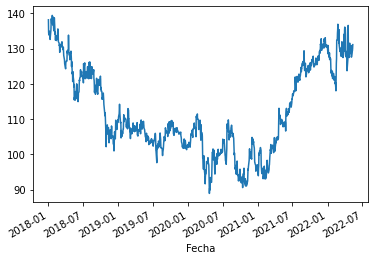

In [33]:
ac['Cierre'].plot();

O un poco más complejas con poca programación:

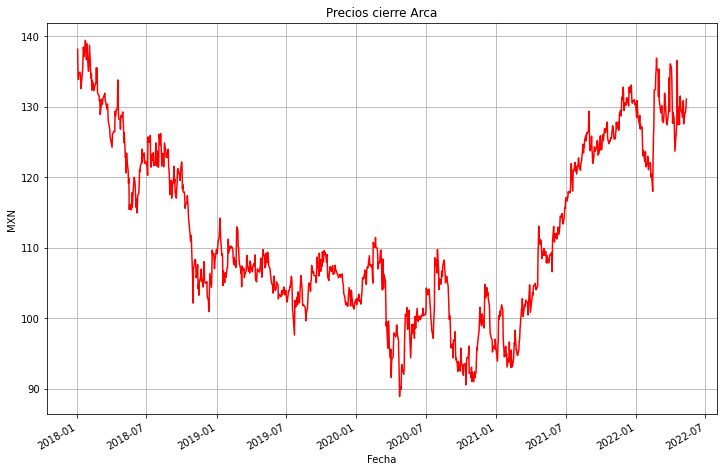

In [34]:
ac['Cierre'].plot(figsize=(12,8), title='Precios cierre Arca', xlabel='Fecha', ylabel='MXN',grid=True, color='red');

Consulta el código de la librería en https://github.com/dabu-io/dabu-dev<br>
Encontraste un bug en el código? Tienes una sugerencia? Ingrésala en https://github.com/dabu-io/dabu-dev/issues/new<br>
Visita www.dabu.digital<br>
Carlos Crespo, carlos@dabu.digital, @dabu_io<br>
_Última actualización 2022-05-16_